<a href="https://colab.research.google.com/github/sashwot10/5CS037/blob/main/worksheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Load IMDB dataset
data = pd.read_csv('/content/drive/MyDrive/Data/IMDB-Dataset.csv')
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [31]:
#Text Preprocessing
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
corpus = []
for review in data['review']:
  review = review.lower()
review = re.sub('[^a-z]', ' ', review)
words = review.split()
words = [ps.stem(word) for word in words if word not in stop_words]
corpus.append(' '.join(words))

In [32]:
#sentiment labels to binary values.
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [33]:
#training and testing sets
X = data['review']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
#Bag-of-Words model using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [35]:
#Train Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [36]:
#Model Evaluation
y_pred = nb.predict(X_test_vec)
y_prob = nb.predict_proba(X_test_vec)[:, 1]


In [37]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8358


In [40]:
#Precision, Recall, F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4961
           1       0.85      0.82      0.83      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



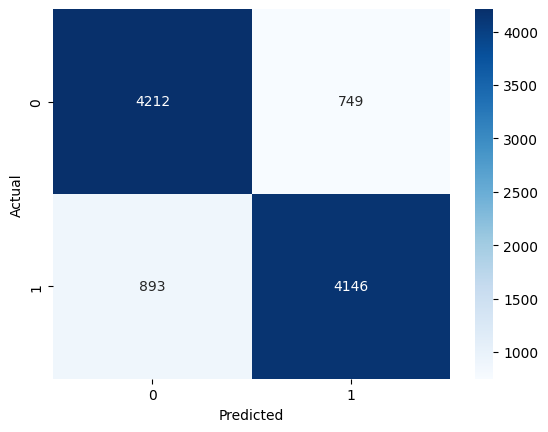

In [42]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
#ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print('ROC-AUC Score:', roc_auc)

ROC-AUC Score: 0.9065299532823576


In [46]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [48]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [50]:
print(X.describe())
print(X.isnull().sum())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [52]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [54]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
#Top 5 Features
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
selected_features = X.columns[rfe.support_]
print('Selected Features:', selected_features)

Selected Features: Index(['radius error', 'worst radius', 'worst texture', 'worst area',
       'worst concave points'],
      dtype='object')


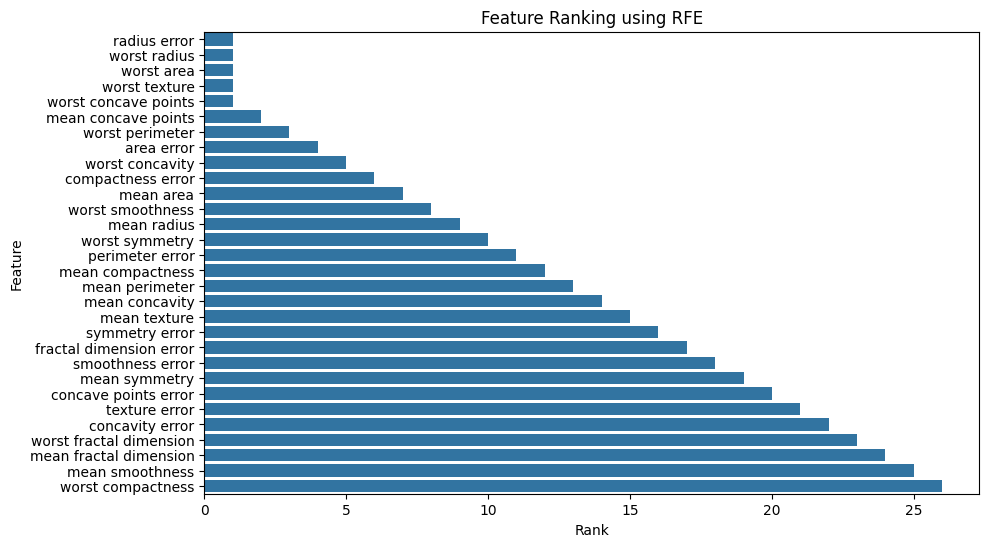

In [58]:
#Feature Ranking Visualization
ranking = pd.DataFrame({
'Feature': X.columns,
'Rank': rfe.ranking_
}).sort_values(by='Rank')
plt.figure(figsize=(10,6))
sns.barplot(x='Rank', y='Feature', data=ranking)
plt.title('Feature Ranking using RFE')
plt.show()

In [60]:
#Train Model with Selected Features

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model.fit(X_train_sel, y_train)
y_pred_sel = model.predict(X_test_sel)
y_prob_sel = model.predict_proba(X_test_sel)[:,1]

In [62]:
#Model Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred_sel))
print('Precision:', precision_score(y_test, y_pred_sel))
print('Recall:', recall_score(y_test, y_pred_sel))
print('F1 Score:', f1_score(y_test, y_pred_sel))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_sel))

Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965
ROC-AUC: 0.990501146413364


In [64]:
#Comparison with All Features
model.fit(X_train_scaled, y_train)
y_pred_all = model.predict(X_test_scaled)
y_prob_all = model.predict_proba(X_test_scaled)[:,1]
print('All Features Accuracy:', accuracy_score(y_test, y_pred_all))
print('All Features ROC-AUC:', roc_auc_score(y_test, y_prob_all))

All Features Accuracy: 0.9736842105263158
All Features ROC-AUC: 0.99737962659679


In [65]:
#Experiment (Top 3 & Top 7 Features)
for n in [3, 7]:
  rfe = RFE(model, n_features_to_select=n)
  rfe.fit(X_train_scaled, y_train)
  X_train_n = X_train_scaled[:, rfe.support_]
  X_test_n = X_test_scaled[:, rfe.support_]
  model.fit(X_train_n, y_train)
  y_pred_n = model.predict(X_test_n)
  print(f'Top {n} Features Accuracy:', accuracy_score(y_test, y_pred_n))

Top 3 Features Accuracy: 0.9649122807017544
Top 7 Features Accuracy: 0.9736842105263158


2. Discuss how feature selection affects model performance.

      Feature selection improves model efficiency and generalization by removing irrelevant features while preserving predictive performance.